# Tugas Proyek Kecil DM ISB-UC

Trisha Alexis Likorawung

0706022110037

In [195]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

I. DECISION TREE

In [29]:
# Load the dataset
data = pd.DataFrame({
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [31]:
# Label encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
data

,outlook,temp,humidity,windy,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [32]:
# Split dataset menjadi features (X) dan target variable (y)
X = data.drop('play', axis=1)
y = data['play']

# Split dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model Decision Tree
dt_model.fit(X_train, y_train)

# Evaluasi akurasi
accuracy = dt_model.score(X_train, y_train)
print(f"Akurasi Model Decision: {accuracy:.2f}")

Akurasi Model Decision: 1.00


In [104]:
# Decision Tree with Iterations
n_iterations = 6
weights = [1 / len(y_train)] * len(y_train)  # Initial weights

for iteration in range(n_iterations):
    # Create and train Decision Tree with weighted samples
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train, sample_weight=weights)
    
    # Predict and calculate error
    dt_pred = dt_model.predict(X_train)
    weighted_error = sum(weights * (dt_pred != y_train)) / sum(weights)
    
    # Avoid division by zero
    alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))
    
    # Update weights
    weights *= np.exp(-alpha * y_train * dt_pred)
    weights /= sum(weights)  # Normalize weights
    
    # Print weighted error for each iteration
    print(f"Iteration {iteration + 1}, Weighted Error: {weighted_error}")

Iteration 1, Weighted Error: 0.0
Iteration 2, Weighted Error: 0.0
Iteration 3, Weighted Error: 0.0
Iteration 4, Weighted Error: 0.0
Iteration 5, Weighted Error: 1.999999999999998e-20
Iteration 6, Weighted Error: 1.999999999999998e-20


In [85]:
# AdaBoost (Boosting)
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
accuracy = boosting_model.score(X_train, y_train)
print(f"Akurasi Model Decision: {accuracy:.2f}")

Akurasi Model Decision: 1.00


C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [86]:
# Bagging
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
accuracy = bagging_model.score(X_train, y_train)
print(f"Akurasi Model Decision: {accuracy:.2f}")

Akurasi Model Decision: 1.00


C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [88]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)
accuracy = random_forest_model.score(X_train, y_train)
print(f"Akurasi Model Decision: {accuracy:.2f}")

Akurasi Model Decision: 1.00


In [89]:
# Regression Tree
regression_tree_model = DecisionTreeRegressor(random_state=42)
regression_tree_model.fit(X_train, y_train)
accuracy = regression_tree_model.score(X_train, y_train)
print(f"Akurasi Model Decision: {accuracy:.2f}")

Akurasi Model Decision: 1.00


C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


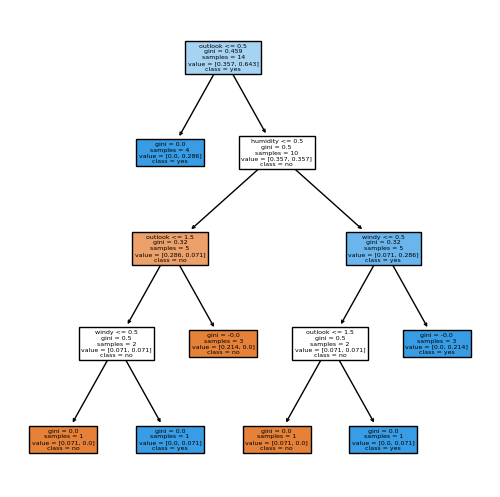

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
# Your DataFrame
data = pd.DataFrame({
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'windy': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})
df = pd.DataFrame(data)
# Label Encoding for categorical features
label_encoder = LabelEncoder()
categorical_features = ['outlook', 'temp', 'humidity', 'windy', 'play']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

X = df.drop(['play'], axis=1)  # Features
y = df['play']  # Target

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize AdaBoost with dt
adaboost_model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=4)

# Train AdaBoost
adaboost_model.fit(X, y)

# Visualize base decision trees
plt.figure(figsize=(15, 10))
for i, tree_in_forest in enumerate(adaboost_model.estimators_):
    plt.subplot(2, 3, i + 1)
    plt.title(f'Estimator {i}')
    plot_tree(tree_in_forest, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)

plt.tight_layout()
plt.show()

II. CLUSTERING 


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [197]:
# Create a simple dataset
data, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Convert the dataset to a DataFrame
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])
df

,Feature 1,Feature 2
0,-9.297689,6.473679
1,-9.698741,6.938967
2,-1.686653,7.793442
3,-7.097308,-5.781333
4,-10.876452,6.315437
...,...,...
295,-3.660191,9.389984
296,3.810884,1.412989
297,-4.116681,9.198920
298,-8.819909,8.999960


In [198]:
# Perform K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [199]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'K-Means Clustering dengan Centroid')

Text(0.5, 0, 'Fitur 1')

Text(0, 0.5, 'Fitur 2')

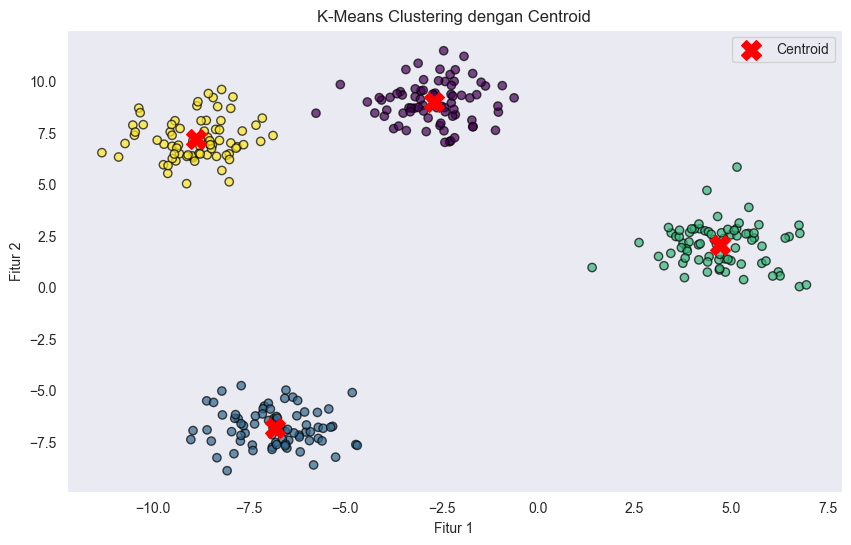

,Feature 1,Feature 2,Cluster
0,-9.297689,6.473679,3
1,-9.698741,6.938967,3
2,-1.686653,7.793442,0
3,-7.097308,-5.781333,1
4,-10.876452,6.315437,3
...,...,...,...
295,-3.660191,9.389984,0
296,3.810884,1.412989,2
297,-4.116681,9.198920,0
298,-8.819909,8.999960,3


In [201]:
# Memplot titik data dan centroid cluster
plt.figure(figsize=(10, 6))

# Memplot titik data
plt.scatter(df['Feature 1'], df['Feature 2'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)

# Memplot centroid cluster
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroid')

plt.title('K-Means Clustering dengan Centroid')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.show()
df

C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


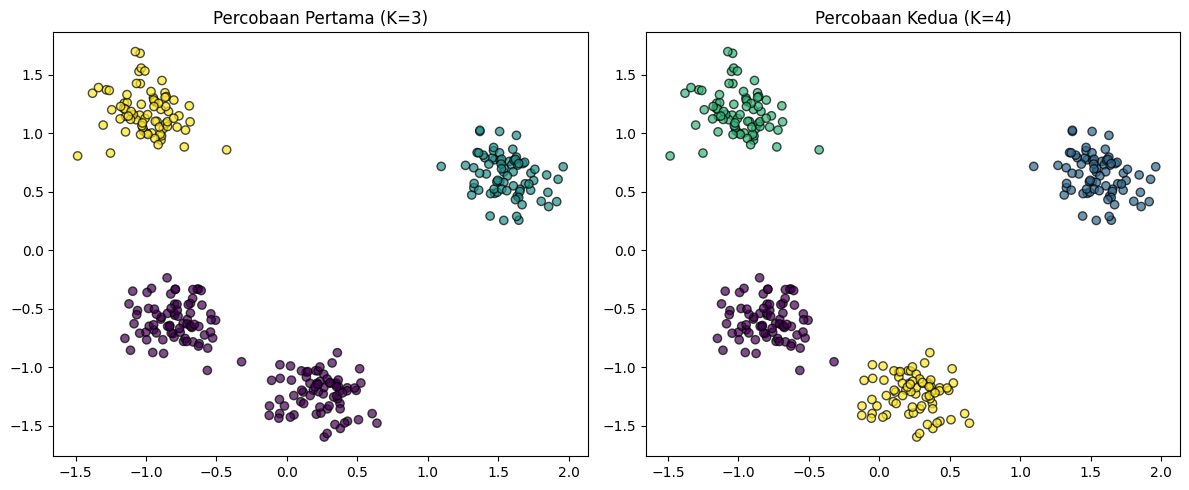

,Fitur 1,Fitur 2,Cluster_1,Cluster_2
0,-9.297689,6.473679,0,3
1,-9.698741,6.938967,0,3
2,-1.686653,7.793442,0,0
3,-7.097308,-5.781333,1,1
4,-10.876452,6.315437,0,3
...,...,...,...,...
295,-3.660191,9.389984,0,0
296,3.810884,1.412989,2,2
297,-4.116681,9.198920,0,0
298,-8.819909,8.999960,0,3


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Membuat dataset sederhana
data, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Mengonversi dataset menjadi DataFrame
df = pd.DataFrame(data, columns=['Fitur 1', 'Fitur 2'])

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Percobaan Pertama: K=3
kmeans_1 = KMeans(n_clusters=3, random_state=42)
df['Cluster_1'] = kmeans_1.fit_predict(data_scaled)

# Visualisasi Percobaan Pertama
pca_1 = PCA(n_components=2)
data_pca_1 = pca_1.fit_transform(data_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_pca_1[:, 0], data_pca_1[:, 1], c=df['Cluster_1'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Percobaan Pertama (K=3)')

# Percobaan Kedua: K=4
kmeans_2 = KMeans(n_clusters=4, random_state=42)
df['Cluster_2'] = kmeans_2.fit_predict(data_scaled)

# Visualisasi Percobaan Kedua
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_scaled)

plt.subplot(1, 2, 2)
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c=df['Cluster_2'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Percobaan Kedua (K=4)')

plt.tight_layout()
plt.show()
df


III. ASSOCIATION RULES MINING

In [188]:
# Contoh dataset pembelian produk
data = {'Transaction': [1, 1, 2, 2, 3, 3, 3, 4, 4, 5],
        'Product': ['Bread', 'Milk', 'Bread', 'Diaper', 'Bread', 'Milk', 'Diaper', 'Bread', 'Milk', 'Diaper']}
df = pd.DataFrame(data)
df

,Transaction,Product
0,1,Bread
1,1,Milk
2,2,Bread
3,2,Diaper
4,3,Bread
5,3,Milk
6,3,Diaper
7,4,Bread
8,4,Milk
9,5,Diaper


In [192]:
# Menerapkan one-hot encoding untuk membuat dataset transaksi
basket = pd.get_dummies(df['Product']).groupby(df['Transaction']).sum()
basket

,Bread,Diaper,Milk
Transaction,,,
1,1,0,1
2,1,1,0
3,1,1,1
4,1,0,1
5,0,1,0


In [190]:
# Menerapkan algoritma Apriori
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets

C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.8,(Bread)
1,0.6,(Diaper)
2,0.6,(Milk)
3,0.4,"(Bread, Diaper)"
4,0.6,"(Bread, Milk)"
5,0.2,"(Milk, Diaper)"
6,0.2,"(Milk, Bread, Diaper)"


In [191]:
# Menerapkan aturan asosiasi dari itemset yang sering muncul
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Milk),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1.00
1,(Milk),(Bread),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.50
2,"(Milk, Diaper)",(Bread),0.2,0.8,0.2,1.00,1.25,0.04,inf,0.25


In [194]:
# Contoh dataset pembelian produk (percobaan kedua)
data_2 = {'Transaction': [6, 6, 7, 7, 8, 8, 9, 9, 10, 10],
          'Product': ['Bread', 'Milk', 'Bread', 'Diaper', 'Bread', 'Milk', 'Diaper', 'Bread', 'Milk', 'Diaper']}
df_2 = pd.DataFrame(data_2)
df_2

# Menerapkan one-hot encoding untuk membuat dataset transaksi (percobaan kedua)
basket_2 = pd.get_dummies(df_2['Product']).groupby(df_2['Transaction']).sum()
basket_2

# Menerapkan algoritma Apriori (percobaan kedua)
frequent_itemsets_2 = apriori(basket_2, min_support=0.2, use_colnames=True)
frequent_itemsets_2

# Menerapkan aturan asosiasi dari itemset yang sering muncul (percobaan kedua)
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.7)
rules_2


,Transaction,Product
0,6,Bread
1,6,Milk
2,7,Bread
3,7,Diaper
4,8,Bread
5,8,Milk
6,9,Diaper
7,9,Bread
8,10,Milk
9,10,Diaper


,Bread,Diaper,Milk
Transaction,,,
6,1,0,1
7,1,1,0
8,1,0,1
9,1,1,0
10,0,1,1


C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.8,(Bread)
1,0.6,(Diaper)
2,0.6,(Milk)
3,0.4,"(Bread, Diaper)"
4,0.4,"(Bread, Milk)"
5,0.2,"(Milk, Diaper)"


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
